In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import warnings
import mne
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

In [3]:
data_path = 'dataset'
channelposition_path = 'newspline62_cl.locs'
montage=mne.channels.read_custom_montage(channelposition_path)
info = mne.create_info(ch_names=montage.ch_names, sfreq=1000,ch_types='eeg')
info.set_montage(montage)
channels = 62
bands = 5

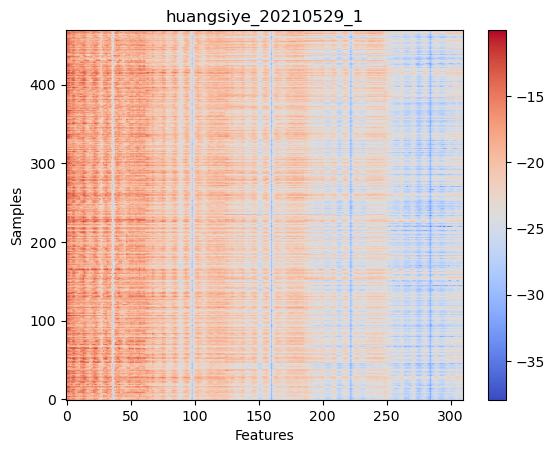

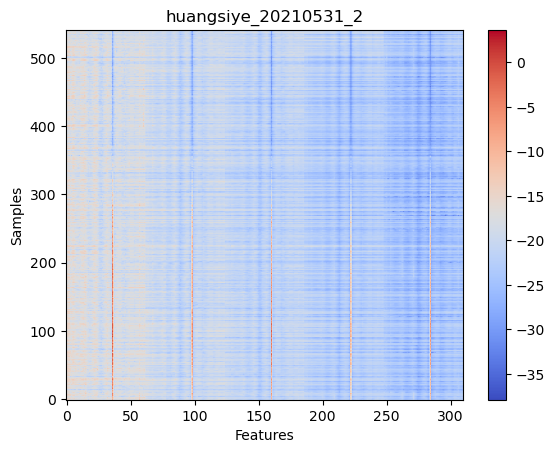

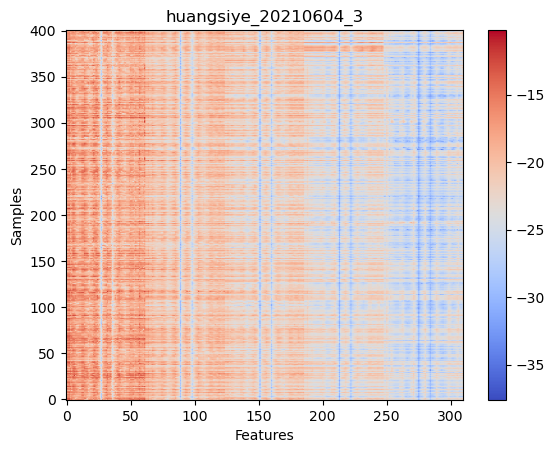

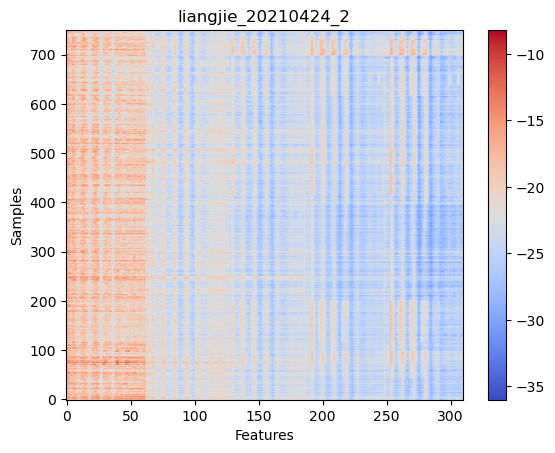

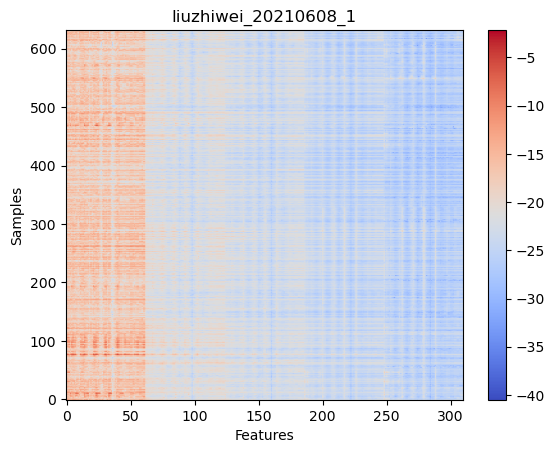

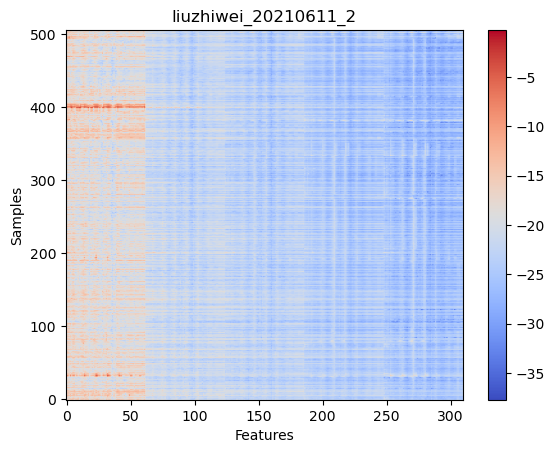

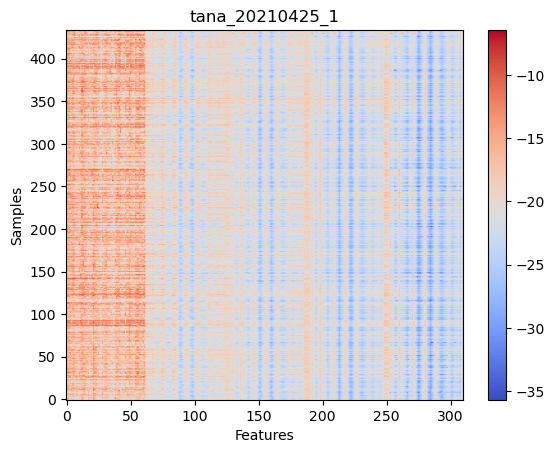

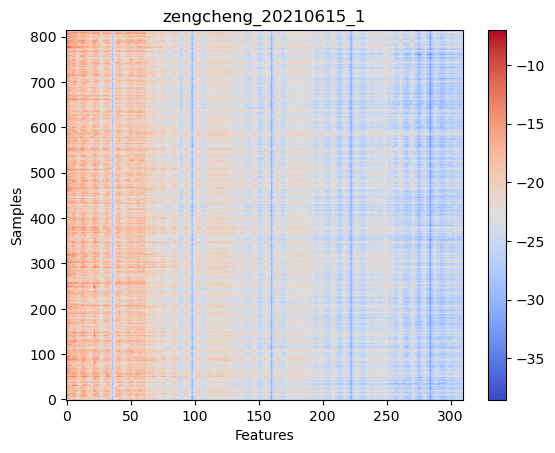

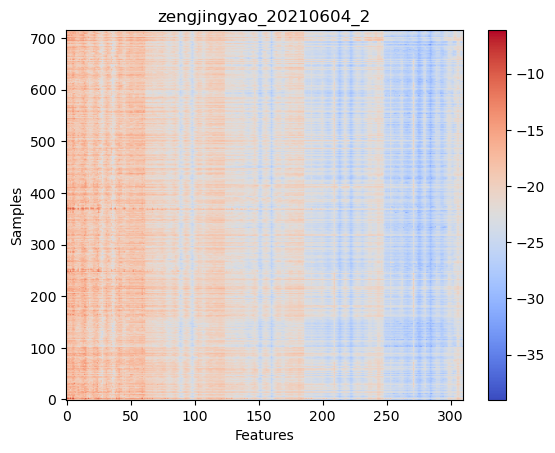

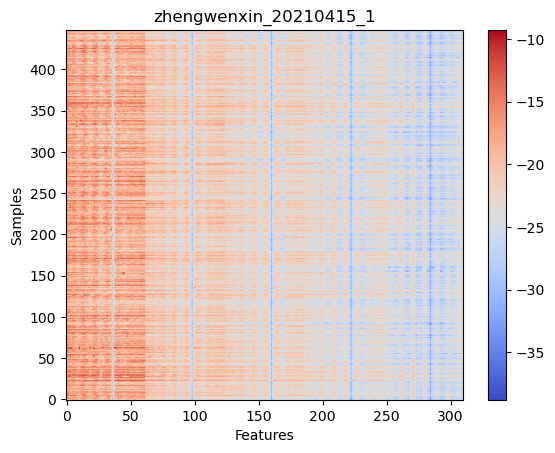

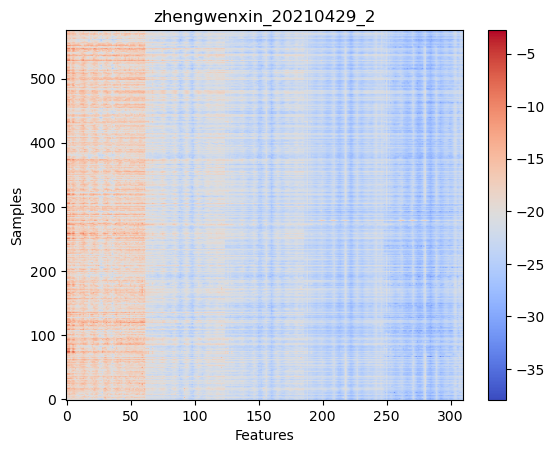

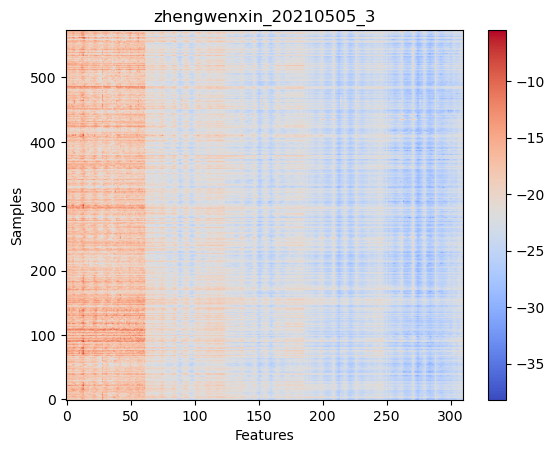

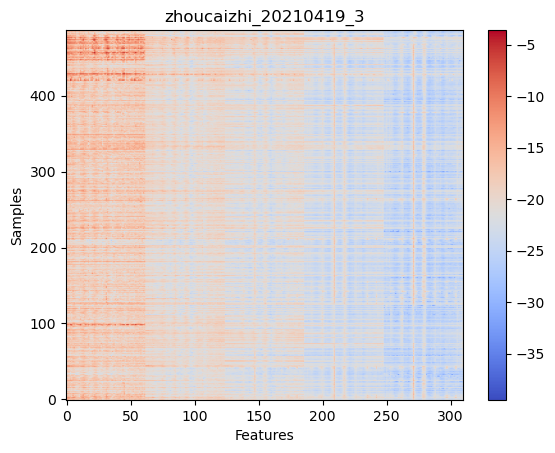

[(460, 310), (531, 310), (384, 310), (633, 310), (552, 310), (449, 310), (426, 310), (697, 310), (670, 310), (397, 310), (509, 310), (501, 310), (402, 310)] [(10, 310), (10, 310), (17, 310), (117, 310), (80, 310), (57, 310), (8, 310), (118, 310), (46, 310), (51, 310), (67, 310), (73, 310), (85, 310)]
0.2884127510304126 0.6703169054568962


In [4]:
subjects = os.listdir(data_path)
pos_shape, neg_shape = [], []
pos, neg = [], []
for person in subjects:
    perpath = os.path.join(data_path, person)
    data_list = os.listdir(perpath)
    data = np.load(os.path.join(perpath, data_list[0]))
    for i in range(1, len(data_list)):
        data = np.concatenate((data, np.load(os.path.join(perpath, data_list[i]))), axis=0)
    data, label = data[:,:-1], data[:,-1]
    data = data.tolist()
    for i in range(len(data)):
        data[i] = np.array(data[i])
        data[i] = data[i].reshape(62,5).T.reshape(1,310).squeeze()
    plt.imshow(np.array(data), cmap = 'coolwarm', origin='lower', aspect="auto")
    plt.xlabel("Features")
    plt.ylabel("Samples")
    plt.title(person)
    plt.colorbar()
    plt.show()
    data = np.array(data)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    pos_shape.append(data[label==1].shape)
    neg_shape.append(data[label==0].shape)
    pos_data, neg_data = np.mean(data[label==1],axis=0), np.mean(data[label==0],axis=0)
    pos.append(pos_data)
    neg.append(neg_data)
print(pos_shape, neg_shape)
pos, neg = np.mean(np.array(pos),axis=0).reshape(bands, channels), np.mean(np.array(neg),axis=0).reshape(bands, channels)
vmin = min(np.min(pos), np.min(neg))
vmax = max(np.max(pos), np.max(neg))
print(vmin,vmax)

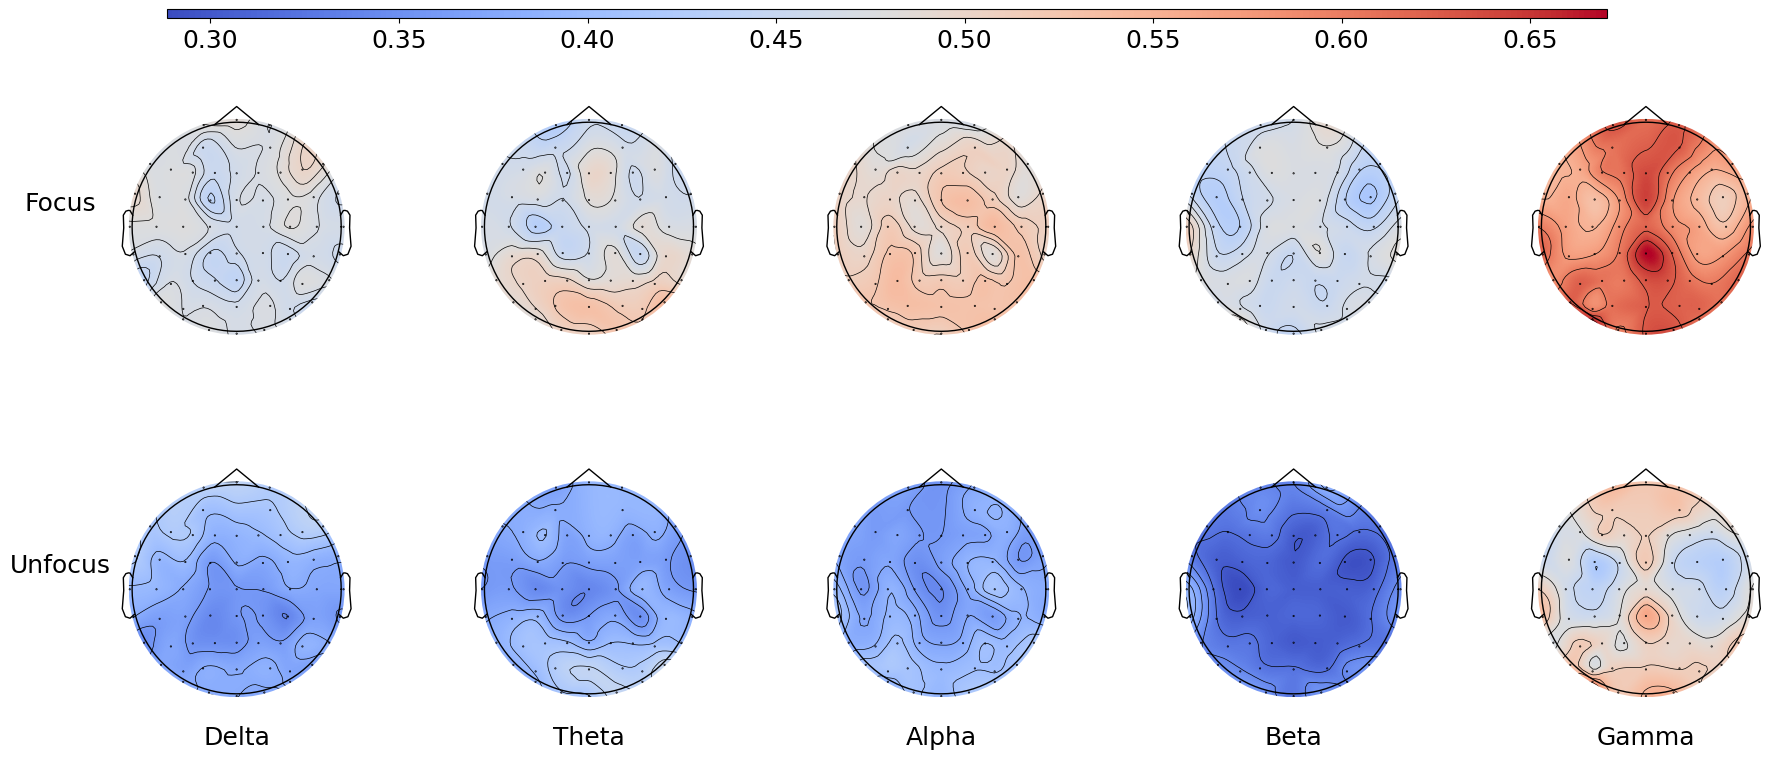

In [5]:
marks = ['Focus', 'Unfocus']
datas = [pos, neg]
band_list = ['Delta' ,'Theta','Alpha', 'Beta', 'Gamma']
fig, axes = plt.subplots(2, bands, figsize=(18, 9))
for i in range(2):
    axes[i][0].get_yaxis().set_label_coords(-0.2, 0.38)
    axes[i][0].set_ylabel(marks[i], fontdict={'fontsize': 18}, rotation=0, labelpad=60)
    for j in range(bands):
        if i == 1:
            axes[i][j].set_xlabel(band_list[j], fontdict={'fontsize': 18}, labelpad=20)
        eeg_ave = datas[i][j,:]
        plt.axes(axes[i][j])
        x, _ = mne.viz.plot_topomap(eeg_ave, info, cmap='coolwarm', show=False, vmin=vmin, vmax=vmax)
        plt.tight_layout()
cbar_ax = plt.gcf().add_axes([0.1, 0.92, 0.8, 0.01])
cbar_ax.tick_params(labelsize=18)
plt.colorbar(x, cax=cbar_ax, orientation='horizontal')
fig.subplots_adjust(wspace=0.4)
fig.show()